In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets/happiness_data.csv")
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.shape
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [5]:
# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

#for year 2012
df_ppltrst_2012 = df.query('year==6')['ppltrst']
print('Count of people for year 2012: {}'.format(df.query('year==6')['ppltrst'].count()))

#for year 2014
df_ppltrst_2014 = df.query('year==7')['ppltrst']
print('Count of people for year 2014: {}'.format(df.query('year==7')['ppltrst'].count()))

Count of people for year 2012: 4071
Count of people for year 2014: 4076


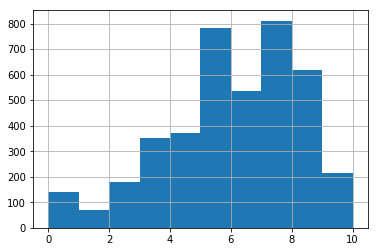

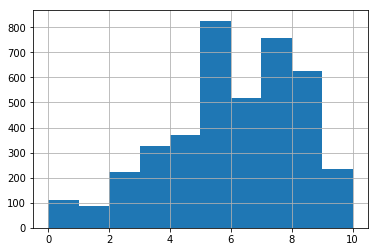

In [6]:
df_ppltrst_2012.hist()
plt.show()

df_ppltrst_2014.hist()
plt.show()

In [7]:
print(df_ppltrst_2012.mean(),df_ppltrst_2014.mean())

tval,pval=stats.ttest_ind(df_ppltrst_2012,df_ppltrst_2014,equal_var=True)

# The F statistic.
print(tval)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(pval)

5.578481945467944 5.5713935230618254
0.1443685081969842
0.8852130548889106


Ans: According to p-value (88%),people didn't differ in terms of trust

Count of people for year 2012: 4071
Count of people for year 2014: 4076


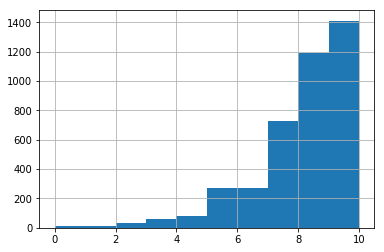

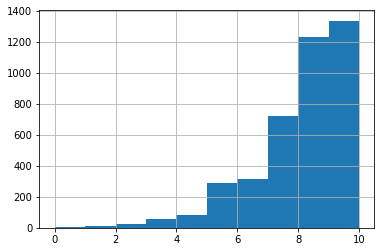

7.731515598133137 7.6854759568204125
1.2074597686358974
0.22729019122839692


In [8]:
# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

#for year 2012
df_pplhappy_2012 = df.query('year==6')['happy']
print('Count of people for year 2012: {}'.format(df.query('year==6')['happy'].count()))

#for year 2014
df_pplhappy_2014 = df.query('year==7')['happy']
print('Count of people for year 2014: {}'.format(df.query('year==7')['happy'].count()))

df_pplhappy_2012.hist()
plt.show()

df_pplhappy_2014.hist()
plt.show()

print(df_pplhappy_2012.mean(),df_pplhappy_2014.mean())

tval_happy,pval_happy=stats.ttest_ind(df_pplhappy_2012,df_pplhappy_2014,equal_var=True)

# The F statistic.
print(tval_happy)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(pval_happy)

Ans: According to p-value (22.72%),people didn't differ in terms of happiness

In [12]:
# 3. Who reported watching more TV in 2012, men or women?
df_2012 = df.query('year==6')
df_2014 = df.query('year==7')

print(df_2012.query('gndr==1')['gndr'].count(),df_2012.query('gndr==2')['gndr'].count())

# 1; male, 2: female
tot_tv_watchtime_male = df_2012.query('gndr==1')['tvtot'].mean()
tot_tv_watchtime_female = df_2012.query('gndr==2')['tvtot'].mean()
print(tot_tv_watchtime_male,tot_tv_watchtime_female)

2053 2018
3.8592303945445687 3.9053518334985133


Ans: Female watched more tv in 2012

In [13]:
#4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
print(df_2012.query('partner==1')['partner'].count(),df_2012.query('partner==2')['partner'].count())

#Living with partner - 1: Lives with husband/wife/partner at household grid | 2: Does not
pplfair_with_partner = df_2012.query('partner==1')['pplfair'].mean()
pplfair_without_partner = df_2012.query('partner==2')['pplfair'].mean()
print(pplfair_with_partner,pplfair_without_partner)

2542 1529
6.0743509047993705 5.86592544146501


Ans: People with a partner likely believed that people were fair in 2012

In [14]:
# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
# Are there differences, and if so, which countries stand out?

df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [26]:
df_2014_cntry_CZ = df_2014.query('cntry=="CZ"')
df_2014_cntry_DE = df_2014.query('cntry=="DE"')
df_2014_cntry_ES = df_2014.query('cntry=="ES"')
df_2014_cntry_CZ.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0


In [23]:
df_2014.query('cntry=="DE"').head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2876,DE,11000031.0,7,1.0,2.0,5.0,3.0,8.0,4.0,4.0,2.0,49.0,1.0
2877,DE,11000041.0,7,2.0,6.0,7.0,5.0,7.0,4.0,2.0,1.0,57.0,1.0
2878,DE,11000071.0,7,4.0,7.0,6.0,6.0,9.0,6.0,3.0,1.0,52.0,1.0
2879,DE,11000091.0,7,5.0,4.0,7.0,7.0,8.0,4.0,2.0,2.0,71.0,1.0
2880,DE,11000131.0,7,4.0,7.0,7.0,7.0,7.0,4.0,3.0,1.0,67.0,1.0


In [27]:
F, p = stats.f_oneway(
    df_2014_cntry_CZ['sclmeet'],
    df_2014_cntry_DE['sclmeet'],
    df_2014_cntry_ES['sclmeet'])

# The F statistic.
print(F)
print(p)

56.89670103430699
1.1476834261467194e-24


Looks like the people from three countries differ in how often they meet socially

In [28]:
print(stats.ttest_ind(df_2014_cntry_CZ['sclmeet'], df_2014_cntry_DE['sclmeet']))
print(stats.ttest_ind(df_2014_cntry_CZ['sclmeet'], df_2014_cntry_ES['sclmeet']))
print(stats.ttest_ind(df_2014_cntry_ES['sclmeet'], df_2014_cntry_DE['sclmeet']))

Ttest_indResult(statistic=0.16846066305094798, pvalue=0.8662760053993819)
Ttest_indResult(statistic=-10.538036641317998, pvalue=3.262659263756715e-25)
Ttest_indResult(statistic=2.168865565712128, pvalue=0.030298013218196748)


ES stands out